Importa as bibliotecas essenciais para a análise exploratória.

In [1]:
import sys
import os
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Adiciona o caminho para a pasta 'src' ao sys.path
sys.path.append(os.path.abspath(os.path.join(os.path.dirname('__file__'), '..', 'src')))

from data_analysis import *
from data_preprocessing import *
from visualization import *

Carrega os dados para a analise

In [43]:
# Caminho para o banco de dados SQLite
db_path = r"C:\GitHub\Projeto-Power-BI-Data-Analysis\data\processed\stg\stg_data.db"

# Conecta ao banco de dados
conn = sqlite3.connect(db_path)
cursor = conn.cursor()
df_olist_customers = pd.read_sql_query(f"SELECT * FROM  stg_olist_customers", conn)
# Fechar a conexão
conn.close()
df_olist_customers.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [44]:
# Verifica se há valores ausentes
contar_valores_nulos(df_olist_customers)

,Total Nulos,Percentual (%)
customer_id,0,0.0
customer_unique_id,0,0.0
customer_zip_code_prefix,0,0.0
customer_city,0,0.0
customer_state,0,0.0


In [ ]:
# Verifica os tipos dos dados
verificar_tipos_dados(df_olist_customers)

,Tipo de Dado
customer_id,object
customer_unique_id,object
customer_zip_code_prefix,int64
customer_city,object
customer_state,object


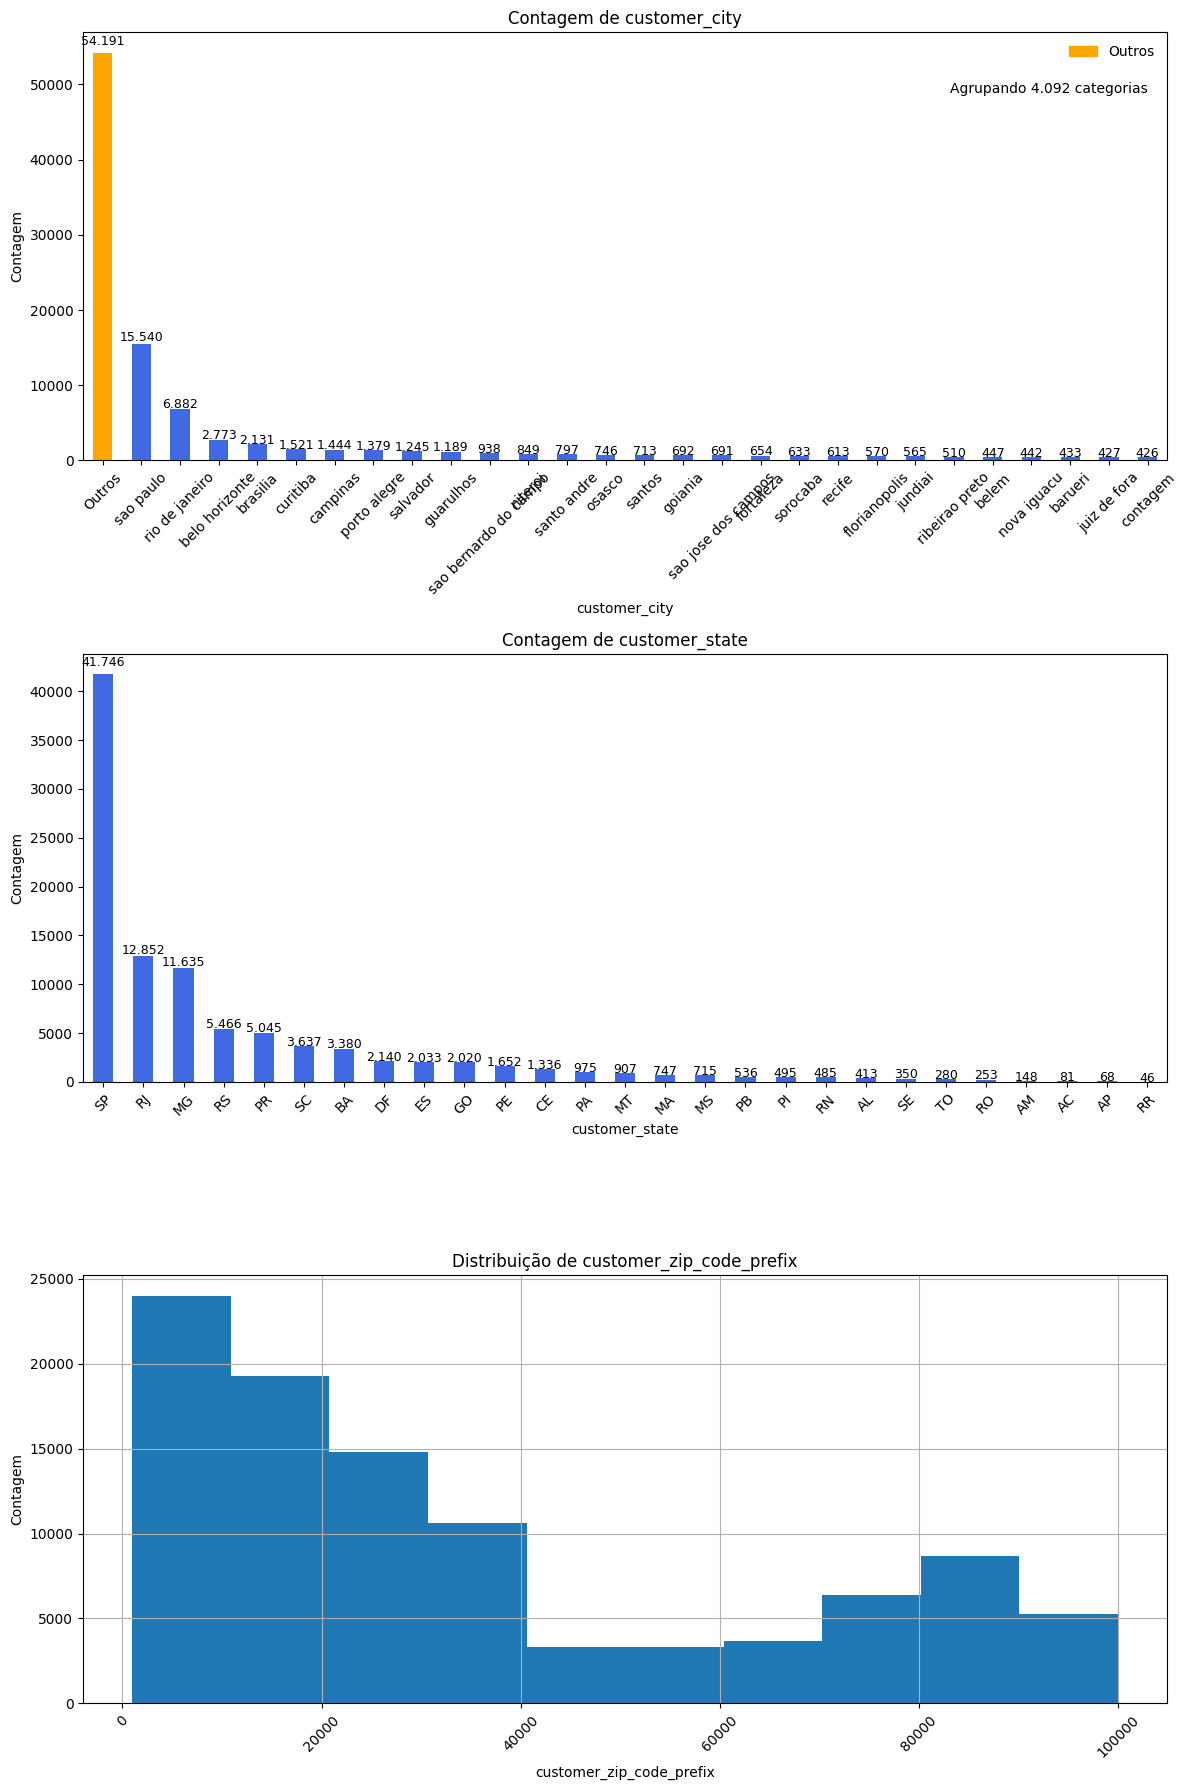

In [ ]:
# Verificar a distribuíção dos dados
plotar_distribuicoes_multiplas_colunas(
    df_olist_customers, ['customer_city', 'customer_state','customer_zip_code_prefix'],
      numero_colunas_subplots=1, quantidade_categorias=27,exibir_rotulos=True)

,Tipo de Dado
customer_id,object
customer_unique_id,object
customer_zip_code_prefix,int64
customer_city,object
customer_state,object


In [7]:
encontrar_colunas_constantes(df_olist_customers)

[]

In [8]:
identificar_outliers(df_olist_customers, "customer_zip_code_prefix", metodo="desvio_padrao", fator=2.7)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state


In [9]:
df_olist_customers["customer_city"] = df_olist_customers["customer_city"].apply(normalizar_texto)

In [10]:
print(df_olist_customers.select_dtypes(include=["number"]).head())


   customer_zip_code_prefix
0                     14409
1                      9790
2                      1151
3                      8775
4                     13056


*Análise da Matriz de Correlação*

A matriz mostra a correlação entre as variáveis do dataset. Os valores variam de -1 a 1, onde:

- 1.00 indica correlação perfeita positiva. 
- 0.00 indica ausência de correlação. 
- -1.00 indica correlação perfeita negativa. 

customer_zip_code_prefix tem uma influência moderada sobre customer_city e customer_state, o que faz sentido geograficamente.
customer_id e customer_unique_id não possuem relevância para a análise de correlação. Se o objetivo for prever ou entender padrões, essas colunas podem ser descartadas.
A correlação entre customer_state e customer_city é fraca (~0.26), indicando que há variação significativa dentro dos estados.

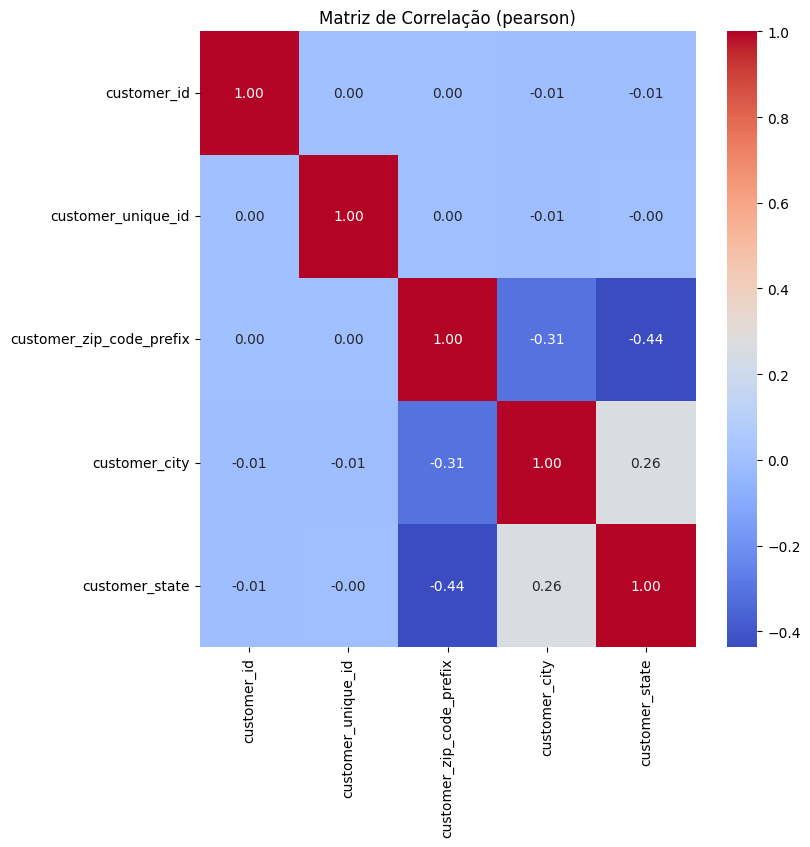

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
customer_id,1.000000,0.002560,0.002042,-0.005715,-0.005860
customer_unique_id,0.002560,1.000000,0.000202,-0.006406,-0.002416
customer_zip_code_prefix,0.002042,0.000202,1.000000,-0.308916,-0.437663
customer_city,-0.005715,-0.006406,-0.308916,1.000000,0.262024
customer_state,-0.005860,-0.002416,-0.437663,0.262024,1.000000


In [11]:
plot_matriz_correlacao_Encoding(df_olist_customers, method="pearson")


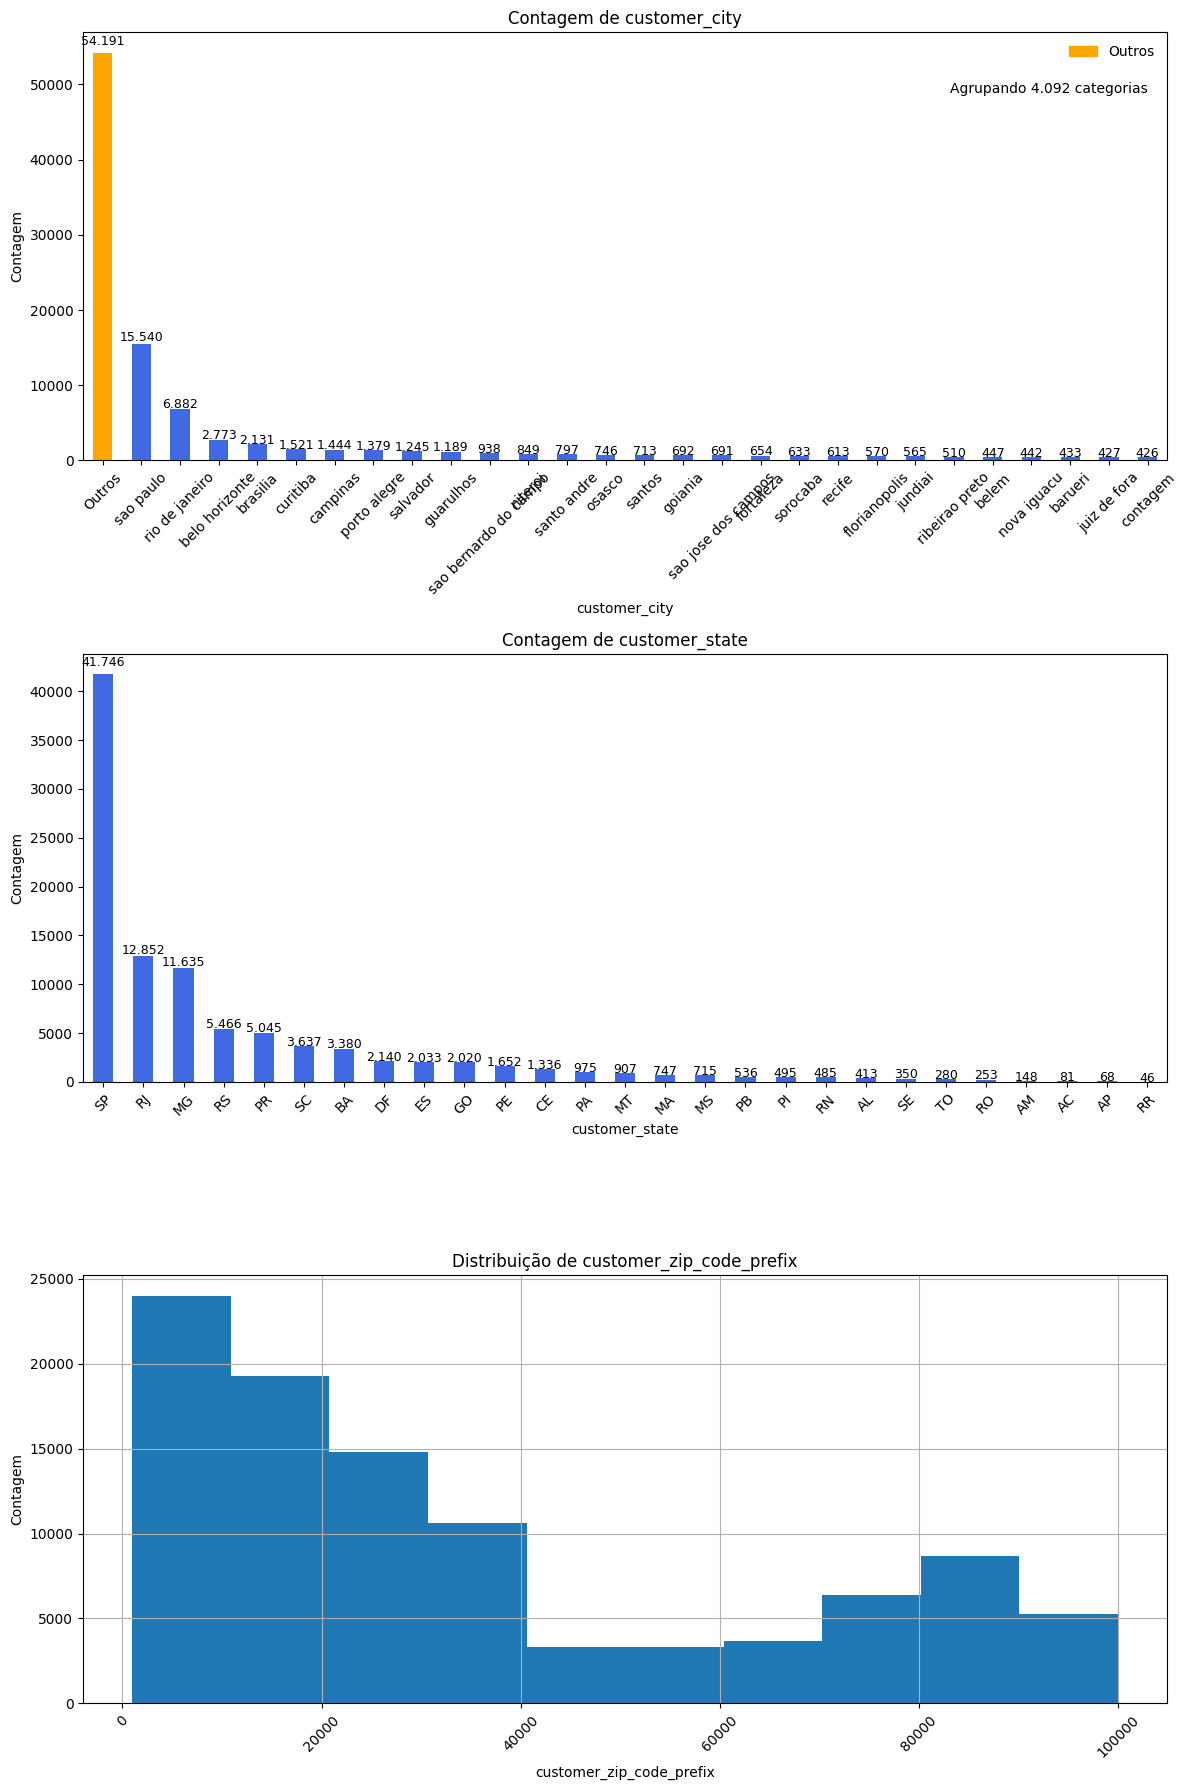

In [21]:
plotar_distribuicoes_multiplas_colunas(
    df_olist_customers, ['customer_city', 'customer_state','customer_zip_code_prefix'],
      numero_colunas_subplots=1, quantidade_categorias=27,exibir_rotulos=True)

In [13]:
# Caminho para o banco de dados SQLite
db_path = r"C:\GitHub\Projeto-Power-BI-Data-Analysis\data\processed\stg\stg_data.db"

# Conecta ao banco de dados
conn = sqlite3.connect(db_path)
cursor = conn.cursor()
df_olist_geolocation = pd.read_sql_query(f"SELECT * FROM  stg_olist_geolocation", conn)
# Fechar a conexão
conn.close()
df_olist_geolocation.head(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [14]:
# Caminho para o banco de dados SQLite
db_path = r"C:\GitHub\Projeto-Power-BI-Data-Analysis\data\processed\stg\stg_data.db"

# Conecta ao banco de dados
conn = sqlite3.connect(db_path)
cursor = conn.cursor()
df_olist_order_items = pd.read_sql_query(f"SELECT * FROM  stg_olist_order_items", conn)
# Fechar a conexão
conn.close()
df_olist_order_items.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [37]:
contar_categorias(df_olist_order_items,col_name=['order_item_id'])


,Frequência
order_item_id,
1,98666
2,9803
3,2287
4,965
5,460
6,256
7,58
8,36
9,28


In [40]:
df_olist_order_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [15]:
# Caminho para o banco de dados SQLite
db_path = r"C:\GitHub\Projeto-Power-BI-Data-Analysis\data\processed\stg\stg_data.db"

# Conecta ao banco de dados
conn = sqlite3.connect(db_path)
cursor = conn.cursor()
df_olist_order_payments = pd.read_sql_query(f"SELECT * FROM  stg_olist_order_payments", conn)
# Fechar a conexão
conn.close()
df_olist_order_payments.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
# Caminho para o banco de dados SQLite
db_path = r"C:\GitHub\Projeto-Power-BI-Data-Analysis\data\processed\stg\stg_data.db"

# Conecta ao banco de dados
conn = sqlite3.connect(db_path)
cursor = conn.cursor()
df_olist_order_reviews = pd.read_sql_query(f"SELECT * FROM  stg_olist_order_reviews", conn)
# Fechar a conexão
conn.close()
df_olist_order_reviews.head(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,None,None,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,None,None,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,None,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,None,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [31]:
gerar_resumo_estatistico(df_olist_order_reviews['review_score'])

count      99224.000000
mean           4.086421
mediana        5.000000
std            1.347579
min            1.000000
max            5.000000
Name: review_score, dtype: float64

In [17]:
# Caminho para o banco de dados SQLite
db_path = r"C:\GitHub\Projeto-Power-BI-Data-Analysis\data\processed\stg\stg_data.db"

# Conecta ao banco de dados
conn = sqlite3.connect(db_path)
cursor = conn.cursor()
df_olist_orders = pd.read_sql_query(f"SELECT * FROM  stg_olist_orders", conn)
# Fechar a conexão
conn.close()
df_olist_orders.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [18]:
# Caminho para o banco de dados SQLite
db_path = r"C:\GitHub\Projeto-Power-BI-Data-Analysis\data\processed\stg\stg_data.db"

# Conecta ao banco de dados
conn = sqlite3.connect(db_path)
cursor = conn.cursor()
df_olist_products = pd.read_sql_query(f"SELECT * FROM  stg_olist_products", conn)
# Fechar a conexão
conn.close()
df_olist_products.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [19]:
# Caminho para o banco de dados SQLite
db_path = r"C:\GitHub\Projeto-Power-BI-Data-Analysis\data\processed\stg\stg_data.db"

# Conecta ao banco de dados
conn = sqlite3.connect(db_path)
cursor = conn.cursor()
df_olist_sellers = pd.read_sql_query(f"SELECT * FROM  stg_olist_sellers", conn)
# Fechar a conexão
conn.close()
df_olist_sellers.head(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [29]:
# Caminho para o banco de dados SQLite
db_path = r"C:\GitHub\Projeto-Power-BI-Data-Analysis\data\processed\stg\stg_data.db"

# Conecta ao banco de dados
conn = sqlite3.connect(db_path)
cursor = conn.cursor()
df_product_category_name_translation = pd.read_sql_query(f"SELECT * FROM  stg_product_category_name_translation", conn)
# Fechar a conexão
conn.close()
df_product_category_name_translation.head(5)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
